# CSE603: Machine Learning - II

# Assignment 2  | 2nd dataset

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 16th October 2022

# Imprting Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import multivariate_normal


from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

import lazypredict

from lazypredict.Supervised import LazyRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.preprocessing import MinMaxScaler



pd.set_option("display.precision", 8)

NumExpr defaulting to 8 threads.


## DataFrame

In [2]:
df_original=pd.read_csv('data.csv')
print(df_original.shape)
print(df_original.columns)
df_original.head()

(11934, 18)
Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')


,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.14,3,289.96,1349.49,6677.38,7.58,7.58,464.01,288,550.56,1.10,1.00,5.95,1.02,7.14,0.08,0.95,0.97
1,2.09,6,6960.18,1376.17,6828.47,28.20,28.20,635.40,288,581.66,1.33,1.00,7.28,1.02,10.65,0.29,0.95,0.97
2,3.14,9,8379.23,1386.76,7111.81,60.36,60.36,606.00,288,587.59,1.39,1.00,7.57,1.02,13.09,0.26,0.95,0.97
3,4.16,12,14724.40,1547.46,7792.63,113.77,113.77,661.47,288,613.85,1.66,1.00,9.01,1.02,18.11,0.36,0.95,0.97
4,5.14,15,21636.43,1924.31,8494.78,175.31,175.31,731.49,288,645.64,2.08,1.00,11.20,1.03,26.37,0.52,0.95,0.97


## About dataset: 

This dataset  is of Condition Based Maintenance of Naval Propulsion Plants Data Set taken from UCI- Machine Learning repository

url

https://data.world/uci/condition-based-maintenance-of-naval-propulsion-plants

https://archive.ics.uci.edu/ml/datasets/Condition+Based+Maintenance+of+Naval+Propulsion+Plants


### Renaming columns

In [3]:
c=[]
for i in range(len(df_original.columns)):
    c.append('c'+str(i))
    

In [4]:
df=df_original.copy()

In [5]:
df.columns=c

In [6]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17
0,1.14,3,289.96,1349.49,6677.38,7.58,7.58,464.01,288,550.56,1.10,1.00,5.95,1.02,7.14,0.08,0.95,0.97
1,2.09,6,6960.18,1376.17,6828.47,28.20,28.20,635.40,288,581.66,1.33,1.00,7.28,1.02,10.65,0.29,0.95,0.97
2,3.14,9,8379.23,1386.76,7111.81,60.36,60.36,606.00,288,587.59,1.39,1.00,7.57,1.02,13.09,0.26,0.95,0.97
3,4.16,12,14724.40,1547.46,7792.63,113.77,113.77,661.47,288,613.85,1.66,1.00,9.01,1.02,18.11,0.36,0.95,0.97
4,5.14,15,21636.43,1924.31,8494.78,175.31,175.31,731.49,288,645.64,2.08,1.00,11.20,1.03,26.37,0.52,0.95,0.97


In [7]:
print(df.shape)
print(df.dtypes)
df.isna().sum()

(11934, 18)
c0     float64
c1       int64
c2     float64
c3     float64
c4     float64
c5     float64
c6     float64
c7     float64
c8       int64
c9     float64
c10    float64
c11    float64
c12    float64
c13    float64
c14    float64
c15    float64
c16    float64
c17    float64
dtype: object


c0     0
c1     0
c2     0
c3     0
c4     0
c5     0
c6     0
c7     0
c8     0
c9     0
c10    0
c11    0
c12    0
c13    0
c14    0
c15    0
c16    0
c17    0
dtype: int64

In [8]:
df=df.astype(float)
df.dtypes

c0     float64
c1     float64
c2     float64
c3     float64
c4     float64
c5     float64
c6     float64
c7     float64
c8     float64
c9     float64
c10    float64
c11    float64
c12    float64
c13    float64
c14    float64
c15    float64
c16    float64
c17    float64
dtype: object

## Feature Selection 

(11934, 17)


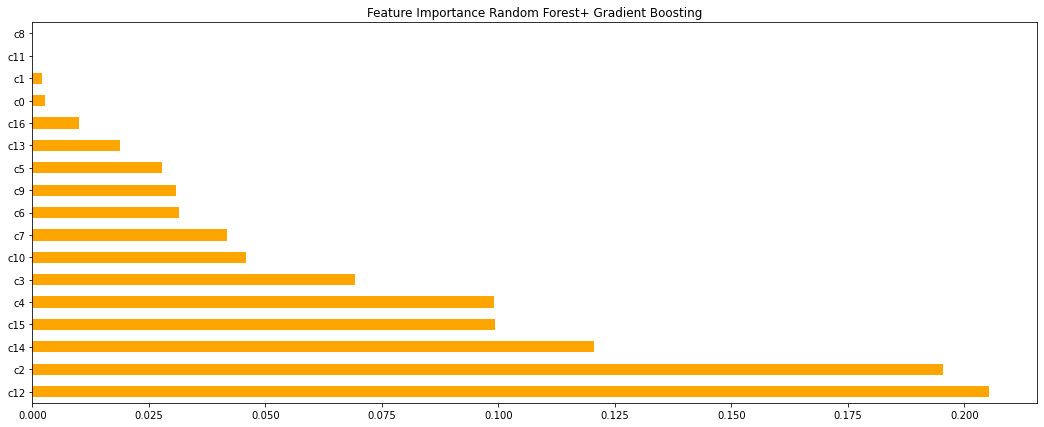

Index(['c12', 'c2', 'c14', 'c15', 'c4', 'c3', 'c10', 'c7', 'c6', 'c17'], dtype='object')


In [9]:
X=df.drop(columns='c17')
print(X.shape)
y= df.c17


trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
    
    
clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)
    

clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)

importance_sorted = importance_GB + importance_rf

importance_sorted = importance_rf.sort_values()


plt.figure(figsize=(18, 7))
importance_sorted.nlargest(20).plot(kind='barh', color='orange')

plt.title("Feature Importance Random Forest+ Gradient Boosting")
plt.show()


z= int(0.5*len(df.columns))
z

b=importance_sorted.nlargest(z)

col = list(b.index)

col.append('c17')
col

dfr =df[col]

print(dfr.columns)

### Chose the best 50% features

# EDA on the best features dataset

In [10]:
dfr.head()

,c12,c2,c14,c15,c4,c3,c10,c7,c6,c17
0,5.95,289.96,7.14,0.08,6677.38,1349.49,1.10,464.01,7.58,0.97
1,7.28,6960.18,10.65,0.29,6828.47,1376.17,1.33,635.40,28.20,0.97
2,7.57,8379.23,13.09,0.26,7111.81,1386.76,1.39,606.00,60.36,0.97
3,9.01,14724.40,18.11,0.36,7792.63,1547.46,1.66,661.47,113.77,0.97
4,11.20,21636.43,26.37,0.52,8494.78,1924.31,2.08,731.49,175.31,0.97


In [11]:
dfr.shape


(11934, 10)

### Checking distplot of all remaining Features

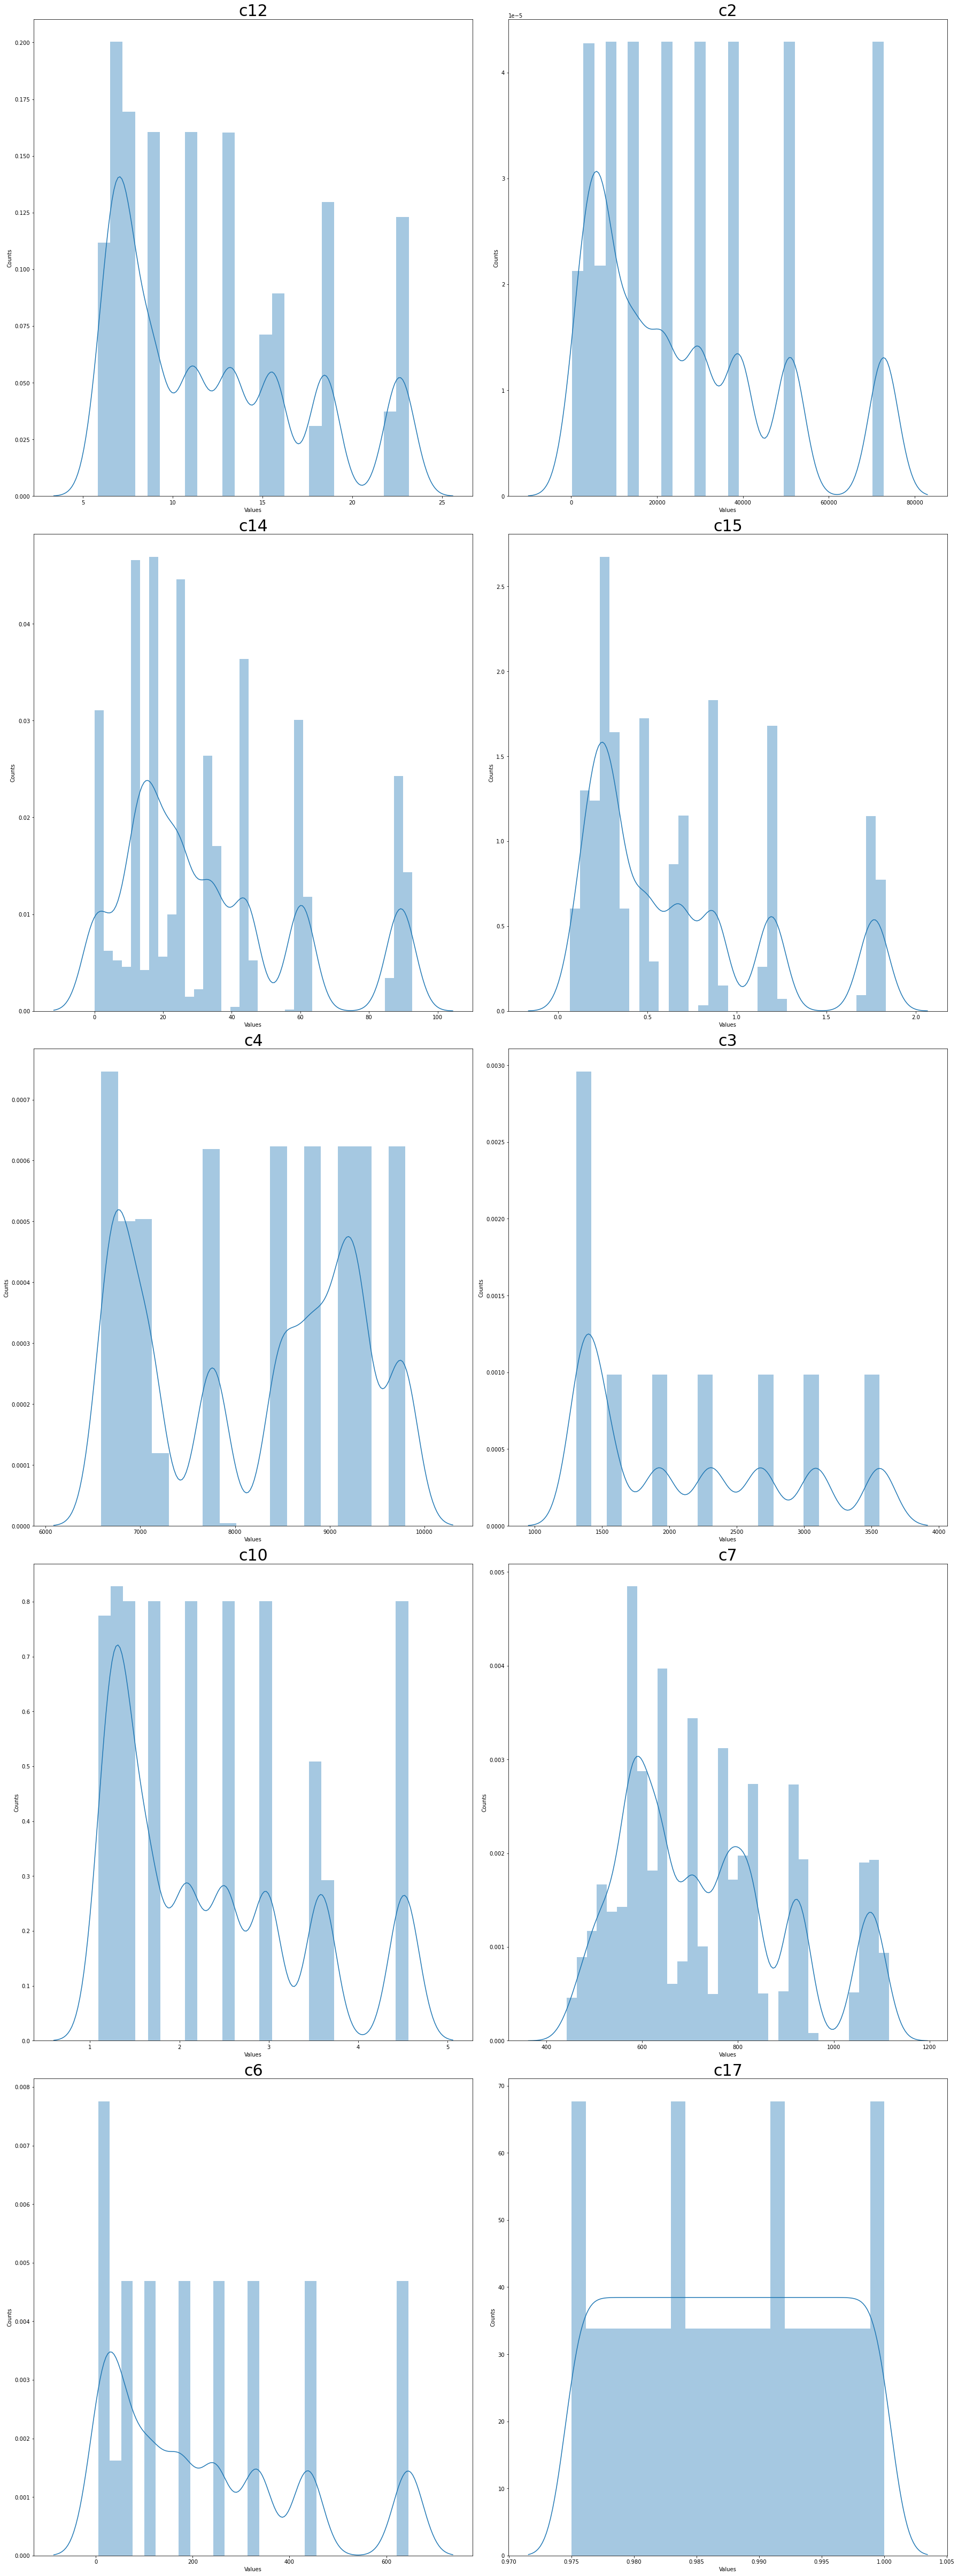

In [12]:
k=int(len(dfr.columns)/2)+1

plt.figure(figsize=(25, 80))

for i, col in enumerate(dfr.columns):

    plt.subplot(k, 2, i+1)
    try:
        sns.distplot(dfr[col])
        # plt.hist(dfr[col])
        plt.tight_layout()
        plt.title(col,size=30)
        plt.xlabel("Values")
        plt.ylabel("Counts")
    except:
        print(col)

### C4 distribution is not close to normal, whereas other columns distribution is skewed and somewaht normala gaussian

#### Removing C4 also

In [13]:
print(dfr.shape)
df_n=dfr.drop(columns='c4')
print(df_n.shape)

(11934, 10)
(11934, 9)


In [14]:
df_s=df_n.copy()

In [15]:
df_s.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,5.95,289.96,7.14,0.08,1349.49,1.10,464.01,7.58,0.97
1,7.28,6960.18,10.65,0.29,1376.17,1.33,635.40,28.20,0.97
2,7.57,8379.23,13.09,0.26,1386.76,1.39,606.00,60.36,0.97
3,9.01,14724.40,18.11,0.36,1547.46,1.66,661.47,113.77,0.97
4,11.20,21636.43,26.37,0.52,1924.31,2.08,731.49,175.31,0.97


In [16]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
X2_Scaled = scaler.fit_transform(df_s)
df_n = pd.DataFrame(X2_Scaled)
df_n.columns = df_s.columns
df_n.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,0.69,0.05,7.71,0.79,1.86,0.09,3.21,0.36,0.00
1,8.40,9.25,11.51,12.41,3.04,6.86,28.66,3.58,0.00
2,10.09,11.20,14.14,10.83,3.51,8.54,24.30,8.60,0.00
3,18.36,19.95,19.57,16.44,10.64,16.30,32.54,16.95,0.00
4,31.01,29.48,28.49,25.74,27.37,28.41,42.93,26.57,0.00


In [17]:
df_n.c17.value_counts()

0.00      459
68.00     459
48.00     459
80.00     459
72.00     459
12.00     459
44.00     459
100.00    459
32.00     459
76.00     459
88.00     459
24.00     459
56.00     459
36.00     459
96.00     459
8.00      459
60.00     459
4.00      459
40.00     459
84.00     459
28.00     459
52.00     459
92.00     459
20.00     459
64.00     459
16.00     459
Name: c17, dtype: int64

# Finding probabbilties of all columns and joint probabilty

In [18]:
df_s.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,5.95,289.96,7.14,0.08,1349.49,1.10,464.01,7.58,0.97
1,7.28,6960.18,10.65,0.29,1376.17,1.33,635.40,28.20,0.97
2,7.57,8379.23,13.09,0.26,1386.76,1.39,606.00,60.36,0.97
3,9.01,14724.40,18.11,0.36,1547.46,1.66,661.47,113.77,0.97
4,11.20,21636.43,26.37,0.52,1924.31,2.08,731.49,175.31,0.97


In [19]:
df_s.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,12.30,27247.50,33.64,0.66,2136.29,2.35,735.50,227.34,0.99
std,5.34,22148.61,25.84,0.51,774.08,1.08,173.68,200.50,0.01
min,5.83,253.55,0.00,0.07,1307.67,1.09,442.36,5.30,0.97
25%,7.45,8375.88,13.68,0.25,1386.76,1.39,589.87,60.32,0.98
50%,11.09,21630.66,25.28,0.50,1924.33,2.08,706.04,175.27,0.99
75%,15.66,39001.43,44.55,0.88,2678.08,2.98,834.07,332.36,0.99
max,23.14,72784.87,92.56,1.83,3560.74,4.56,1115.80,645.25,1.00


In [20]:
df_n.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.37,37.22,36.35,33.70,36.78,36.34,43.53,34.70,50.00
std,30.83,30.54,27.92,28.75,34.36,31.29,25.79,31.33,30.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.35,11.20,14.78,10.09,3.51,8.54,21.90,8.60,24.00
50%,30.41,29.47,27.31,24.26,27.37,28.55,39.15,26.56,50.00
75%,56.78,53.42,48.14,46.15,60.82,54.46,58.16,51.11,76.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [21]:
df_n.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,0.69,0.05,7.71,0.79,1.86,0.09,3.21,0.36,0.00
1,8.40,9.25,11.51,12.41,3.04,6.86,28.66,3.58,0.00
2,10.09,11.20,14.14,10.83,3.51,8.54,24.30,8.60,0.00
3,18.36,19.95,19.57,16.44,10.64,16.30,32.54,16.95,0.00
4,31.01,29.48,28.49,25.74,27.37,28.41,42.93,26.57,0.00


#### Findining probabilities of all columns

In [22]:
df_n.dtypes

c12    float64
c2     float64
c14    float64
c15    float64
c3     float64
c10    float64
c7     float64
c6     float64
c17    float64
dtype: object

In [23]:
df_n_prob=df_n.copy()

def f1(b):
    
    k=df_n[df_n[i] == b].shape[0]
    return(k/len(df_n))

for i in df_n.columns:
    df_n_prob['prob_'+i] = df_n[i].apply(f1)

df_n_prob.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17,prob_c12,prob_c2,prob_c14,prob_c15,prob_c3,prob_c10,prob_c7,prob_c6,prob_c17
0,0.69,0.05,7.71,0.79,1.86,0.09,3.21,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
1,8.40,9.25,11.51,12.41,3.04,6.86,28.66,3.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
2,10.09,11.20,14.14,10.83,3.51,8.54,24.30,8.60,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04
3,18.36,19.95,19.57,16.44,10.64,16.30,32.54,16.95,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04
4,31.01,29.48,28.49,25.74,27.37,28.41,42.93,26.57,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04


In [24]:
df_n_prob.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17,prob_c12,prob_c2,prob_c14,prob_c15,prob_c3,prob_c10,prob_c7,prob_c6,prob_c17
0,0.69,0.05,7.71,0.79,1.86,0.09,3.21,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
1,8.40,9.25,11.51,12.41,3.04,6.86,28.66,3.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
2,10.09,11.20,14.14,10.83,3.51,8.54,24.30,8.60,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04
3,18.36,19.95,19.57,16.44,10.64,16.30,32.54,16.95,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04
4,31.01,29.48,28.49,25.74,27.37,28.41,42.93,26.57,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04


In [25]:
df_n_prob.dtypes

c12         float64
c2          float64
c14         float64
c15         float64
c3          float64
c10         float64
c7          float64
c6          float64
c17         float64
prob_c12    float64
prob_c2     float64
prob_c14    float64
prob_c15    float64
prob_c3     float64
prob_c10    float64
prob_c7     float64
prob_c6     float64
prob_c17    float64
dtype: object

In [26]:
df_n_prob.prob_c2.value_counts()

0.00    10958
0.00      882
0.00       90
0.00        4
Name: prob_c2, dtype: int64

In [27]:
df_n_prob.prob_c2.unique()

array([8.37942014e-05, 1.67588403e-04, 2.51382604e-04, 3.35176806e-04])

### Joint probability

In [28]:
col=df_n.columns
col

Index(['c12', 'c2', 'c14', 'c15', 'c3', 'c10', 'c7', 'c6', 'c17'], dtype='object')

In [29]:
col[0]

'c12'

In [30]:

def f1(a):
    
    
    k=df_n[ (df_n[col[0]] == a[col[0]]) & (df_n[col[1]] == a[col[1]]) & (df_n[col[2]] == a[col[2]]) 
           & (df_n[col[3]] == a[col[3]]) & (df_n[col[4]] == a[col[4]]) & (df_n[col[5]] == a[col[5]])  
           & (df_n[col[6]] == a[col[6]]) & (df_n[col[7]] == a[col[7]]) & (df_n[col[8]] == a[col[8]])].shape[0]
   
    # k=df_n[ (df_n['c12'] == a['c12']) & (df_n['c2'] == a['c2']) & (df_n['c14'] == a['c14']) 
    #        & (df_n['c15'] == a['c15']) & (df_n['c3'] == a['c3']) & (df_n['c7'] == a['c7'])  
    #        & (df_n['c6'] == a['c6']) & (df_n['c10'] == a['c10']) & (df_n['c17'] == a['c17'])].shape[0]
    return(k/len(df_n))
    

df_n_prob['prob_joint'] = df_n.apply(f1,axis=1)

print('done')

# df_n

done


In [31]:
df_n_prob.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17,prob_c12,prob_c2,prob_c14,prob_c15,prob_c3,prob_c10,prob_c7,prob_c6,prob_c17,prob_joint
0,0.69,0.05,7.71,0.79,1.86,0.09,3.21,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
1,8.40,9.25,11.51,12.41,3.04,6.86,28.66,3.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00
2,10.09,11.20,14.14,10.83,3.51,8.54,24.30,8.60,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.00
3,18.36,19.95,19.57,16.44,10.64,16.30,32.54,16.95,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04,0.00
4,31.01,29.48,28.49,25.74,27.37,28.41,42.93,26.57,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04,0.00


In [32]:
df_n_prob.prob_joint.unique()

array([8.37942014e-05])

#### This shows that all the rows in dataset are unique and hence the ombined joint probability is same for all rows

# Applying automl Lazy predict all models 

### Making samller dataset to run lazy predict as full dataset takes tooo much time

In [33]:
df_np=df_n.sample(frac =.2)
print(df_np.shape)

(2387, 9)


In [34]:
X= df_np.drop(columns='c17')
X
y=df_np['c17']
y
offset = int(X.shape[0] * 0.9)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)



### fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  5%|▍         | 2/42 [00:00<00:02, 15.74it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.16911958710517405, 'Adjusted R-Squared': 0.14021939883057144, 'RMSE': 26.521169069981177, 'Time taken': 0.036000967025756836}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9287917924581992, 'Adjusted R-Squared': 0.926314985239354, 'RMSE': 7.764051911988367, 'Time taken': 0.09110188484191895}
{'Model': 'BayesianRidge', 'R-Squared': 0.7613567069037792, 'Adjusted R-Squared': 0.7530560706221715, 'RMSE': 14.213401372578957, 'Time taken': 0.015000343322753906}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8612118472792631, 'Adjusted R-Squared': 0.8563844332715853, 'RMSE': 10.839259188198886, 'Time taken': 0.021936416625976562}
{'Model': 'DummyRegressor', 'R-Squared': -0.004980794305957437, 'Adjusted R-Squared': -0.03993664802094732, 'RMSE': 29.16770673343765, 'Time taken': 0.006919384002685547}
{'Model': 'ElasticNet', 'R-Squared': -0.004820512155760293, 'Adjusted R-Squared': -0.03977079083943891, 'RMSE': 29.16538069437464, 'Time taken': 0.0080

 17%|█▋        | 7/42 [00:00<00:01, 24.23it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.30806048756383253, 'Adjusted R-Squared': 0.283993026261705, 'RMSE': 24.202346213145937, 'Time taken': 0.12029409408569336}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8700689829514697, 'Adjusted R-Squared': 0.8655496432280426, 'RMSE': 10.487689535792104, 'Time taken': 0.008054971694946289}


 24%|██▍       | 10/42 [00:00<00:02, 14.42it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9548755113500249, 'Adjusted R-Squared': 0.9533059639187215, 'RMSE': 6.180584527745132, 'Time taken': 0.3217153549194336}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.999737797311974, 'Adjusted R-Squared': 0.9997286772184775, 'RMSE': 0.4711313168195117, 'Time taken': 2.365335702896118}


 29%|██▊       | 12/42 [00:03<00:12,  2.40it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7737734936994841, 'Adjusted R-Squared': 0.7659047456542487, 'RMSE': 13.838695323662927, 'Time taken': 0.2841360569000244}


 33%|███▎      | 14/42 [00:03<00:10,  2.72it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9492780081621155, 'Adjusted R-Squared': 0.9475137649677543, 'RMSE': 6.552719135629373, 'Time taken': 0.41959071159362793}
{'Model': 'HuberRegressor', 'R-Squared': 0.7521457529417791, 'Adjusted R-Squared': 0.7435247356527974, 'RMSE': 14.48510294737983, 'Time taken': 0.06839513778686523}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.804776076733607, 'Adjusted R-Squared': 0.797985679402602, 'RMSE': 12.855528091465564, 'Time taken': 0.014636993408203125}


 48%|████▊     | 20/42 [00:05<00:06,  3.35it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.305341440199691, 'Adjusted R-Squared': -2.42030983811968, 'RMSE': 52.897064031869284, 'Time taken': 1.6556293964385986}
{'Model': 'Lars', 'R-Squared': -1.7969443336792028, 'Adjusted R-Squared': -1.8942293539810882, 'RMSE': 48.65923927878936, 'Time taken': 0.008088111877441406}
{'Model': 'LarsCV', 'R-Squared': -0.18178092422476877, 'Adjusted R-Squared': -0.2228863476760652, 'RMSE': 31.62946829900825, 'Time taken': 0.018062591552734375}
{'Model': 'Lasso', 'R-Squared': -0.004980794305957437, 'Adjusted R-Squared': -0.03993664802094732, 'RMSE': 29.16770673343765, 'Time taken': 0.006000041961669922}
{'Model': 'LassoCV', 'R-Squared': 0.37314567236856677, 'Adjusted R-Squared': 0.35134204358138643, 'RMSE': 23.03598132749671, 'Time taken': 0.17036676406860352}
{'Model': 'LassoLars', 'R-Squared': -0.004980794305957437, 'Adjusted R-Squared': -0.03993664802094732, 'RMSE': 29.16770673343765, 'Time taken': 0.00708770751953125}
{'Model': 'LassoLarsCV', 'R-Squar

 64%|██████▍   | 27/42 [00:06<00:03,  4.24it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.034175963923170016, 'Adjusted R-Squared': 0.0005820844074542197, 'RMSE': 28.593835098190674, 'Time taken': 1.0813283920288086}
{'Model': 'NuSVR', 'R-Squared': 0.005707767838835642, 'Adjusted R-Squared': -0.028876309801552758, 'RMSE': 29.012184247096908, 'Time taken': 0.16332411766052246}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.007275903050233401, 'Adjusted R-Squared': -0.04231158663458934, 'RMSE': 29.20099338065504, 'Time taken': 0.00800013542175293}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5556435879368595, 'Adjusted R-Squared': 0.5401877127346633, 'RMSE': 19.394970765176254, 'Time taken': 0.015955448150634766}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6594904457708305, 'Adjusted R-Squared': 0.6476466351889463, 'RMSE': 16.978059633555073, 'Time taken': 0.017278432846069336}
{'Model': 'PoissonRegressor', 'R-Squared': 0.06236167536758741, 'Adjusted R-Squared': 0.029748168423851307, 'RMSE': 28.17351789592

 76%|███████▌  | 32/42 [04:59<04:12, 25.21s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.0002236783268318998, 'Adjusted R-Squared': -0.03501406713819999, 'RMSE': 29.098591605115093, 'Time taken': 292.8185269832611}
{'Model': 'RANSACRegressor', 'R-Squared': 0.716420920129529, 'Adjusted R-Squared': 0.7065572999601213, 'RMSE': 15.493891062145915, 'Time taken': 0.03216838836669922}


 81%|████████  | 34/42 [05:00<02:42, 20.33s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9461484885824745, 'Adjusted R-Squared': 0.9442753925331693, 'RMSE': 6.751843262968917, 'Time taken': 0.722663164138794}
{'Model': 'Ridge', 'R-Squared': 0.466821750095209, 'Adjusted R-Squared': 0.448276419663738, 'RMSE': 21.245140913548905, 'Time taken': 0.006079435348510742}
{'Model': 'RidgeCV', 'R-Squared': 0.7297722366785957, 'Adjusted R-Squared': 0.7203730101282859, 'RMSE': 15.124756339987007, 'Time taken': 0.00991678237915039}
{'Model': 'SGDRegressor', 'R-Squared': 0.10194932452330485, 'Adjusted R-Squared': 0.07071277928933284, 'RMSE': 27.57235271662652, 'Time taken': 0.017091751098632812}


 90%|█████████ | 38/42 [05:00<00:52, 13.04s/it]

{'Model': 'SVR', 'R-Squared': 0.0005467196933963692, 'Adjusted R-Squared': -0.03421687266509421, 'RMSE': 29.08738320436114, 'Time taken': 0.20095014572143555}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7614226580726478, 'Adjusted R-Squared': 0.7531243157447398, 'RMSE': 14.211437237750514, 'Time taken': 0.007027387619018555}
{'Model': 'TweedieRegressor', 'R-Squared': -0.0021223430115080433, 'Adjusted R-Squared': -0.036978772333647436, 'RMSE': 29.126196567680925, 'Time taken': 0.012026786804199219}


100%|██████████| 42/42 [05:01<00:00,  7.18s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9489270167575486, 'Adjusted R-Squared': 0.9471505651665069, 'RMSE': 6.575352148069615, 'Time taken': 0.787886381149292}
{'Model': 'LGBMRegressor', 'R-Squared': 0.943276109486364, 'Adjusted R-Squared': 0.9413031045989332, 'RMSE': 6.929571953532398, 'Time taken': 0.0758206844329834}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GaussianProcessRegressor                     1.00       1.00  0.47        2.37
ExtraTreesRegressor                          0.95       0.95  6.18        0.32
HistGradientBoostingRegressor                0.95       0.95  6.55        0.42
XGBRegressor                                 0.95       0.95  6.58        0.79
RandomForestRegressor                        0.94       0.95  6.75        0.72
LGBMRegressor                                0.94       0.94  6.93        0.08
BaggingRegressor                             

# Creating dataset by Multivariate Gausian

<AxesSubplot:ylabel='Density'>

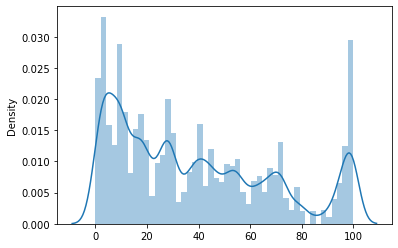

In [35]:
sns.distplot(df_n)

In [36]:
df_n.cov()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
c12,950.55,939.20,836.78,876.84,1055.06,964.07,787.56,962.24,-16.93
c2,939.20,932.48,833.71,873.58,1038.36,954.39,780.56,955.93,0.33
c14,836.78,833.71,779.51,791.06,923.11,852.34,698.21,855.02,-15.81
c15,876.84,873.58,791.06,826.50,968.19,892.97,731.30,895.64,-14.94
c3,1055.06,1038.36,923.11,968.19,1180.40,1069.71,868.03,1064.16,-0.02
c10,964.07,954.39,852.34,892.97,1069.71,978.97,798.37,978.32,-2.55
c7,787.56,780.56,698.21,731.30,868.03,798.37,665.14,796.67,-29.76
c6,962.24,955.93,855.02,895.64,1064.16,978.32,796.67,981.58,0.10
c17,-16.93,0.33,-15.81,-14.94,-0.02,-2.55,-29.76,0.10,900.08


In [37]:
mean=df_n.mean()

In [38]:
mean

c12   37.37
c2    37.22
c14   36.35
c15   33.70
c3    36.78
c10   36.34
c7    43.53
c6    34.70
c17   50.00
dtype: float64

In [39]:
df_n.c12.mode().mean()

7.969423906346272

In [40]:
mode=df_n.mode().mean()
mode

c12    7.97
c2    69.96
c14    0.00
c15    9.81
c3    60.82
c10    8.60
c7    19.64
c6     8.60
c17   50.00
dtype: float64

In [41]:
dfr.shape

(11934, 10)

# Part 1 Making datset on the basis of mean of columns and covariance matrix

In [42]:
random_seed=1000
cov = df_n.cov()
mean= df_n.mean()

distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)

# distr = multivariate_normal(cov = cov, mean = mean,
# 								seed = random_seed,allow_singular=True)


data = distr.rvs(size = df_n.shape[0])

### Generated data

In [43]:
df_g=pd.DataFrame(data)

In [44]:
df_g.head()

,0,1,2,3,4,5,6,7,8
0,61.89,60.98,59.28,57.27,65.42,61.52,62.09,59.78,40.03
1,50.49,52.50,50.78,49.67,46.65,50.09,58.04,50.31,29.94
2,-2.90,-1.43,2.77,-1.18,-6.68,-3.68,11.38,-6.26,80.12
3,51.52,49.29,38.90,40.84,55.14,50.27,53.18,47.12,74.42
4,37.55,39.81,46.56,40.63,35.34,38.37,40.23,37.29,67.46


In [45]:
df_g.columns = df_n.columns

In [46]:
df_g.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,61.89,60.98,59.28,57.27,65.42,61.52,62.09,59.78,40.03
1,50.49,52.50,50.78,49.67,46.65,50.09,58.04,50.31,29.94
2,-2.90,-1.43,2.77,-1.18,-6.68,-3.68,11.38,-6.26,80.12
3,51.52,49.29,38.90,40.84,55.14,50.27,53.18,47.12,74.42
4,37.55,39.81,46.56,40.63,35.34,38.37,40.23,37.29,67.46


<AxesSubplot:ylabel='Density'>

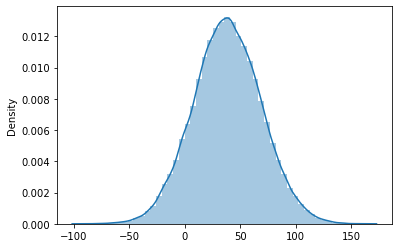

In [47]:
sns.distplot(df_g)

In [48]:
df_n.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.37,37.22,36.35,33.70,36.78,36.34,43.53,34.70,50.00
std,30.83,30.54,27.92,28.75,34.36,31.29,25.79,31.33,30.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.35,11.20,14.78,10.09,3.51,8.54,21.90,8.60,24.00
50%,30.41,29.47,27.31,24.26,27.37,28.55,39.15,26.56,50.00
75%,56.78,53.42,48.14,46.15,60.82,54.46,58.16,51.11,76.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [49]:
df_g.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.16,37.04,36.33,33.59,36.53,36.15,43.37,34.52,50.35
std,30.79,30.51,27.89,28.74,34.31,31.26,25.77,31.30,30.22
min,-78.76,-78.66,-65.19,-74.11,-92.20,-81.63,-56.28,-84.50,-54.16
25%,16.56,16.59,17.54,14.33,13.36,15.26,26.36,13.53,29.76
50%,36.92,36.78,35.94,33.50,36.24,35.94,43.04,34.31,50.50
75%,58.09,57.70,55.33,52.98,59.58,57.42,60.77,55.85,70.84
max,151.93,150.81,143.91,141.54,163.82,152.48,140.92,150.05,159.65


# Finding probabbilties of all columns and joint probabilty on generated data set

#### Findining probabilities of all columns

In [50]:
df_g_prob=df_g.copy()

def f1(b):
    
    k=df_g[df_g[i] == b].shape[0]
    return(k/len(df_g))

for i in df_g.columns:
    # print(i)
    
    df_g_prob['prob_'+i] = df_g[i].apply(f1)

df_g_prob.head()
df_g_prob.head()
df_g_prob.prob_c2.value_counts()
df_g_prob.prob_c2.unique()


### Joint probability
df_g.columns

def f1(a):
    
    
    k=df_n[ (df_n[col[0]] == a[col[0]]) & (df_n[col[1]] == a[col[1]]) & (df_n[col[2]] == a[col[2]]) 
        & (df_n[col[3]] == a[col[3]]) & (df_n[col[4]] == a[col[4]]) & (df_n[col[5]] == a[col[5]])  
        & (df_n[col[6]] == a[col[6]]) & (df_n[col[7]] == a[col[7]]) & (df_n[col[8]] == a[col[8]])].shape[0]
   
    
    return(k/len(df_g))
    

df_g_prob['prob_joint'] = df_g.apply(f1,axis=1)

print('done')

# df_g
df_g_prob.head()
df_g_prob.prob_joint.unique()

done


array([0.])

#### This shows that all the rows in dataset are unique and hence the ombined joint probability is same for all rows

## Use model on new generated dataset

### Again creating smaller smaple dataset for running lazy predic models on generated dataste

In [51]:
df_gp=df_g.sample(frac =.2)
print(df_gp.shape)

(2387, 9)


In [52]:
X= df_gp.drop(columns='c17')
X
y=df_gp['c17']
y
offset = int(X.shape[0] * 0.9)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)



### fitting data in LazyClassifier
models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)

  2%|▏         | 1/42 [00:00<00:04,  8.90it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0007741975472810303, 'Adjusted R-Squared': -0.035583734853273485, 'RMSE': 31.76210645485914, 'Time taken': 0.11239814758300781}


  5%|▍         | 2/42 [00:00<00:04,  8.53it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.11890761595208388, 'Adjusted R-Squared': 0.0882609243330259, 'RMSE': 29.802450193892835, 'Time taken': 0.12063980102539062}
{'Model': 'BayesianRidge', 'R-Squared': 0.8061695498603364, 'Adjusted R-Squared': 0.7994276211598264, 'RMSE': 13.978232163404762, 'Time taken': 0.009913444519042969}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.6037191312254913, 'Adjusted R-Squared': -0.6595006662246388, 'RMSE': 40.2073455382473, 'Time taken': 0.02209019660949707}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005908953037074838, 'Adjusted R-Squared': -0.0353940568794886, 'RMSE': 31.75919754093755, 'Time taken': 0.005915403366088867}
{'Model': 'ElasticNet', 'R-Squared': 0.000829140186143329, 'Adjusted R-Squared': -0.03392462885086034, 'RMSE': 31.736653262166733, 'Time taken': 0.006854534149169922}


 17%|█▋        | 7/42 [00:00<00:01, 19.03it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.32526079311448264, 'Adjusted R-Squared': 0.30179160330976895, 'RMSE': 26.08009808167453, 'Time taken': 0.13890337944030762}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.6397241042073631, 'Adjusted R-Squared': -0.6967579860928366, 'RMSE': 40.65618628673978, 'Time taken': 0.009999513626098633}


 21%|██▏       | 9/42 [00:00<00:03,  9.97it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.17105436212592084, 'Adjusted R-Squared': 0.14222147037377897, 'RMSE': 28.907083201028286, 'Time taken': 0.39753150939941406}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:03<00:14,  2.20it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -80.44770013985875, 'Adjusted R-Squared': -83.28066362298428, 'RMSE': 286.5369672612481, 'Time taken': 2.4804723262786865}


 29%|██▊       | 12/42 [00:03<00:13,  2.30it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.1086930035411715, 'Adjusted R-Squared': 0.07769102105564707, 'RMSE': 29.974704128119125, 'Time taken': 0.34035778045654297}


 31%|███       | 13/42 [00:04<00:12,  2.29it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.16485563190357, 'Adjusted R-Squared': 0.1358071321436941, 'RMSE': 29.01496329897533, 'Time taken': 0.4407017230987549}
{'Model': 'HuberRegressor', 'R-Squared': 0.7979341561829953, 'Adjusted R-Squared': 0.7909057790067517, 'RMSE': 14.272094136707889, 'Time taken': 0.06752347946166992}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.02455109432248692, 'Adjusted R-Squared': -0.06018765412500815, 'RMSE': 32.13720165862138, 'Time taken': 0.015050411224365234}


 38%|███▊      | 16/42 [00:05<00:12,  2.01it/s]

{'Model': 'KernelRidge', 'R-Squared': -1.9429175123055078, 'Adjusted R-Squared': -2.0452798605596123, 'RMSE': 54.46660325507294, 'Time taken': 1.6196489334106445}
{'Model': 'Lars', 'R-Squared': 0.7913726419058656, 'Adjusted R-Squared': 0.7841160381460697, 'RMSE': 14.501965794926228, 'Time taken': 0.009998559951782227}
{'Model': 'LarsCV', 'R-Squared': 0.0979602411787922, 'Adjusted R-Squared': 0.06658494521979363, 'RMSE': 30.154635781937692, 'Time taken': 0.02177262306213379}
{'Model': 'Lasso', 'R-Squared': -0.0005908953037074838, 'Adjusted R-Squared': -0.0353940568794886, 'RMSE': 31.75919754093755, 'Time taken': 0.00698399543762207}


 48%|████▊     | 20/42 [00:06<00:06,  3.47it/s]

{'Model': 'LassoCV', 'R-Squared': 0.39436936365123243, 'Adjusted R-Squared': 0.37330395021301443, 'RMSE': 24.708430827960868, 'Time taken': 0.1766676902770996}
{'Model': 'LassoLars', 'R-Squared': -0.0005908953037074838, 'Adjusted R-Squared': -0.0353940568794886, 'RMSE': 31.75919754093755, 'Time taken': 0.00794839859008789}
{'Model': 'LassoLarsCV', 'R-Squared': 0.8061592138332982, 'Adjusted R-Squared': 0.7994169256188043, 'RMSE': 13.97860485371075, 'Time taken': 0.021493196487426758}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8061592138332982, 'Adjusted R-Squared': 0.7994169256188043, 'RMSE': 13.97860485371075, 'Time taken': 0.012999773025512695}
{'Model': 'LinearRegression', 'R-Squared': 0.8061592138330412, 'Adjusted R-Squared': 0.7994169256185383, 'RMSE': 13.978604853720016, 'Time taken': 0.007479429244995117}
{'Model': 'LinearSVR', 'R-Squared': 0.07705476909410669, 'Adjusted R-Squared': 0.044952326279988686, 'RMSE': 30.502062892155845, 'Time taken': 0.007999658584594727}


 64%|██████▍   | 27/42 [00:07<00:03,  4.25it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.06619616422217389, 'Adjusted R-Squared': 0.03371603080381469, 'RMSE': 30.680969148881616, 'Time taken': 1.1572339534759521}
{'Model': 'NuSVR', 'R-Squared': 0.009436316364202724, 'Adjusted R-Squared': -0.025018072631824984, 'RMSE': 31.59966278201928, 'Time taken': 0.15230822563171387}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0007394427433056183, 'Adjusted R-Squared': -0.03401744620475333, 'RMSE': 31.738077759653038, 'Time taken': 0.009000062942504883}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.33661642353202836, 'Adjusted R-Squared': 0.3135422121766206, 'RMSE': 25.859707299694787, 'Time taken': 0.017579317092895508}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6753090339469183, 'Adjusted R-Squared': 0.6640154351276807, 'RMSE': 18.091573872432544, 'Time taken': 0.014384746551513672}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 76%|███████▌  | 32/42 [05:39<04:48, 28.90s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.0010321640853676595, 'Adjusted R-Squared': -0.03585067414051091, 'RMSE': 31.766199802152308, 'Time taken': 332.1426646709442}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7729664813699826, 'Adjusted R-Squared': 0.7650696633306776, 'RMSE': 15.128164462590412, 'Time taken': 0.03981184959411621}


 81%|████████  | 34/42 [05:40<03:06, 23.27s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.18488565760212194, 'Adjusted R-Squared': 0.1565338543882827, 'RMSE': 28.664905516834065, 'Time taken': 1.0202674865722656}
{'Model': 'Ridge', 'R-Squared': 0.47316154808304633, 'Adjusted R-Squared': 0.45483673236419575, 'RMSE': 23.045173368272827, 'Time taken': 0.009074211120605469}
{'Model': 'RidgeCV', 'R-Squared': 0.768387281448967, 'Adjusted R-Squared': 0.7603311868906701, 'RMSE': 15.279968159528558, 'Time taken': 0.010111331939697266}
{'Model': 'SGDRegressor', 'R-Squared': 0.16744954827935388, 'Adjusted R-Squared': 0.1384912716977662, 'RMSE': 28.9698687485288, 'Time taken': 0.030057907104492188}


 98%|█████████▊| 41/42 [05:41<00:10, 10.74s/it]

{'Model': 'SVR', 'R-Squared': 0.005570946626266671, 'Adjusted R-Squared': -0.029017890012819736, 'RMSE': 31.661256729222046, 'Time taken': 0.19172215461730957}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8061592138330412, 'Adjusted R-Squared': 0.7994169256185383, 'RMSE': 13.978604853720016, 'Time taken': 0.010029792785644531}
{'Model': 'TweedieRegressor', 'R-Squared': 0.002965814989804527, 'Adjusted R-Squared': -0.03171363492359358, 'RMSE': 31.70270151204908, 'Time taken': 0.011749744415283203}
{'Model': 'XGBRegressor', 'R-Squared': 0.15341137434680396, 'Adjusted R-Squared': 0.12396481345451882, 'RMSE': 29.213087653292305, 'Time taken': 0.1643364429473877}


100%|██████████| 42/42 [05:41<00:00,  8.12s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.16529364926969925, 'Adjusted R-Squared': 0.1362603848964714, 'RMSE': 29.007353402327425, 'Time taken': 0.07998275756835938}
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BayesianRidge                                0.80       0.81  13.98   
LassoLarsCV                                  0.80       0.81  13.98   
LassoLarsIC                                  0.80       0.81  13.98   
TransformedTargetRegressor                   0.80       0.81  13.98   
LinearRegression                             0.80       0.81  13.98   
HuberRegressor                               0.79       0.80  14.27   
Lars                                         0.78       0.79  14.50   
RANSACRegressor                              0.77       0.77  15.13   
RidgeCV                                      0.76       0.77  15.28   
PassiveAggressiveRegressor                   0.66    

# Part 2- Making multivariate gausian based on mean of the modes of columns and covariance matrix

In [53]:
random_seed=1000
cov = df_n.cov()
# mean= df_n.mean()

mode=df_n.mode().mean()
# mode

distr = multivariate_normal(cov = cov, mean = mode,
								seed = random_seed)

# distr = multivariate_normal(cov = cov, mean = mean,
# 								seed = random_seed,allow_singular=True)


data = distr.rvs(size = df_n.shape[0])

### Generated data

In [54]:
df_g=pd.DataFrame(data)

In [55]:
df_g.head()

,0,1,2,3,4,5,6,7,8
0,32.49,93.72,22.93,33.38,89.46,33.77,38.20,33.68,40.03
1,21.09,85.23,14.43,25.78,70.69,22.35,34.15,24.21,29.94
2,-32.30,31.31,-33.58,-25.07,17.37,-31.43,-12.51,-32.36,80.12
3,22.12,82.03,2.55,16.94,79.18,22.53,29.29,21.02,74.42
4,8.16,72.55,10.21,16.74,59.38,10.62,16.34,11.19,67.46


In [56]:
df_g.columns = df_n.columns

In [57]:
df_g.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,32.49,93.72,22.93,33.38,89.46,33.77,38.20,33.68,40.03
1,21.09,85.23,14.43,25.78,70.69,22.35,34.15,24.21,29.94
2,-32.30,31.31,-33.58,-25.07,17.37,-31.43,-12.51,-32.36,80.12
3,22.12,82.03,2.55,16.94,79.18,22.53,29.29,21.02,74.42
4,8.16,72.55,10.21,16.74,59.38,10.62,16.34,11.19,67.46


<AxesSubplot:ylabel='Density'>

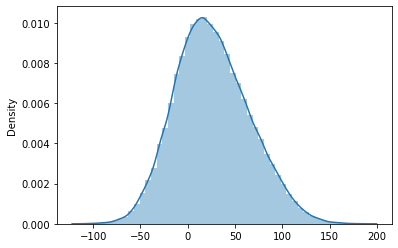

In [58]:
sns.distplot(df_g)

In [59]:
df_n.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.37,37.22,36.35,33.70,36.78,36.34,43.53,34.70,50.00
std,30.83,30.54,27.92,28.75,34.36,31.29,25.79,31.33,30.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.35,11.20,14.78,10.09,3.51,8.54,21.90,8.60,24.00
50%,30.41,29.47,27.31,24.26,27.37,28.55,39.15,26.56,50.00
75%,56.78,53.42,48.14,46.15,60.82,54.46,58.16,51.11,76.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [60]:
df_g.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,7.76,69.78,-0.02,9.69,60.58,8.40,19.48,8.43,50.35
std,30.79,30.51,27.89,28.74,34.31,31.26,25.77,31.30,30.22
min,-108.16,-45.92,-101.54,-98.00,-68.15,-109.37,-80.17,-110.60,-54.16
25%,-12.84,49.33,-18.81,-9.56,37.41,-12.48,2.47,-12.57,29.76
50%,7.52,69.52,-0.41,9.61,60.29,8.19,19.15,8.21,50.50
75%,28.69,90.44,18.99,29.09,83.63,29.68,36.88,29.76,70.84
max,122.53,183.55,107.57,117.65,187.87,124.73,117.03,123.95,159.65


# Finding probabbilties of all columns and joint probabilty on generated data set

#### Findining probabilities of all columns

In [61]:
df_g_prob=df_g.copy()

def f1(b):
    
    k=df_g[df_g[i] == b].shape[0]
    return(k/len(df_g))

for i in df_g.columns:
    # print(i)
    
    df_g_prob['prob_'+i] = df_g[i].apply(f1)

df_g_prob.head()
df_g_prob.head()
df_g_prob.prob_c2.value_counts()
df_g_prob.prob_c2.unique()


### Joint probability
df_g.columns

def f1(a):
    
    k=df_n[ (df_n[col[0]] == a[col[0]]) & (df_n[col[1]] == a[col[1]]) & (df_n[col[2]] == a[col[2]]) 
        & (df_n[col[3]] == a[col[3]]) & (df_n[col[4]] == a[col[4]]) & (df_n[col[5]] == a[col[5]])  
        & (df_n[col[6]] == a[col[6]]) & (df_n[col[7]] == a[col[7]]) & (df_n[col[8]] == a[col[8]])].shape[0]
   
    
    return(k/len(df_g))
    

df_g_prob['prob_joint'] = df_g.apply(f1,axis=1)

print('done')

# df_g
df_g_prob.head()
df_g_prob.prob_joint.unique()

done


array([0.])

#### This shows that all the rows in dataset are unique and hence the ombined joint probability is same for all rows

## Use model on new generated dataset

### Again creating smaller smaple dataset for running lazy predic models on generated dataste

In [62]:
df_gp=df_g.sample(frac =.2)
print(df_gp.shape)

(2387, 9)


In [63]:
X= df_gp.drop(columns='c17')
X
y=df_gp['c17']
y
offset = int(X.shape[0] * 0.9)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)


### fitting data in LazyClassifier
models_2, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models_2)

  5%|▍         | 2/42 [00:00<00:04,  9.88it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.001159123418840613, 'Adjusted R-Squared': -0.0359820494508003, 'RMSE': 30.56522543737075, 'Time taken': 0.08444833755493164}
{'Model': 'BaggingRegressor', 'R-Squared': -0.019136323050279014, 'Adjusted R-Squared': -0.054584542982462736, 'RMSE': 30.838424967464903, 'Time taken': 0.1180276870727539}
{'Model': 'BayesianRidge', 'R-Squared': 0.8127981597628828, 'Adjusted R-Squared': 0.8062867914068093, 'RMSE': 13.216945690680904, 'Time taken': 0.013000249862670898}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.0804738071069093, 'Adjusted R-Squared': -1.1528381134410628, 'RMSE': 44.061286636802336, 'Time taken': 0.024799346923828125}
{'Model': 'DummyRegressor', 'R-Squared': -0.022007199443880854, 'Adjusted R-Squared': -0.05755527594627674, 'RMSE': 30.881829879546544, 'Time taken': 0.009378433227539062}
{'Model': 'ElasticNet', 'R-Squared': -0.019996271970310175, 'Adjusted R-Squared': -0.05547440316927754, 'RMSE': 30.851432981070296, 'Time tak

 17%|█▋        | 7/42 [00:00<00:01, 19.04it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2648596377966145, 'Adjusted R-Squared': 0.23928953824171406, 'RMSE': 26.191548922892853, 'Time taken': 0.1354818344116211}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.9086774337702119, 'Adjusted R-Squared': -0.9750662140752628, 'RMSE': 42.2029022606209, 'Time taken': 0.009133338928222656}


 21%|██▏       | 9/42 [00:00<00:03,  9.40it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.016454832260696994, 'Adjusted R-Squared': -0.017755434443278872, 'RMSE': 30.29515669527755, 'Time taken': 0.44310569763183594}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:03<00:13,  2.23it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -534.7730388429464, 'Adjusted R-Squared': -553.4086228027011, 'RMSE': 707.0766184549643, 'Time taken': 2.4476327896118164}


 29%|██▊       | 12/42 [00:03<00:13,  2.28it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.028452442394580446, 'Adjusted R-Squared': -0.0053405161308255344, 'RMSE': 30.109814560655526, 'Time taken': 0.3876655101776123}


 31%|███       | 13/42 [00:04<00:12,  2.30it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.0947944169064141, 'Adjusted R-Squared': 0.06330900532055017, 'RMSE': 29.063616921794342, 'Time taken': 0.4214189052581787}
{'Model': 'HuberRegressor', 'R-Squared': 0.7974608944606199, 'Adjusted R-Squared': 0.7904160560070762, 'RMSE': 13.747714118908364, 'Time taken': 0.07269525527954102}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.1705499743779113, 'Adjusted R-Squared': -0.21126475609540396, 'RMSE': 33.04996687456362, 'Time taken': 0.015548229217529297}


 38%|███▊      | 16/42 [00:05<00:12,  2.02it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.648878291550374, 'Adjusted R-Squared': -2.7757957973434304, 'RMSE': 58.351998860407946, 'Time taken': 1.5966434478759766}
{'Model': 'Lars', 'R-Squared': -4.153293664871167, 'Adjusted R-Squared': -4.332538661910164, 'RMSE': 69.34553363635413, 'Time taken': 0.011002540588378906}
{'Model': 'LarsCV', 'R-Squared': 0.7887535614878581, 'Adjusted R-Squared': 0.7814058592787402, 'RMSE': 14.040117633914797, 'Time taken': 0.019353628158569336}
{'Model': 'Lasso', 'R-Squared': -0.022007199443880854, 'Adjusted R-Squared': -0.05755527594627674, 'RMSE': 30.881829879546544, 'Time taken': 0.006835222244262695}


 48%|████▊     | 20/42 [00:06<00:06,  3.47it/s]

{'Model': 'LassoCV', 'R-Squared': 0.34067304690185474, 'Adjusted R-Squared': 0.31773993548974533, 'RMSE': 24.804270771949284, 'Time taken': 0.18724679946899414}
{'Model': 'LassoLars', 'R-Squared': -0.022007199443880854, 'Adjusted R-Squared': -0.05755527594627674, 'RMSE': 30.881829879546544, 'Time taken': 0.00796055793762207}
{'Model': 'LassoLarsCV', 'R-Squared': 0.8129529363741375, 'Adjusted R-Squared': 0.8064469515523683, 'RMSE': 13.211480741529876, 'Time taken': 0.020003795623779297}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8129529363741375, 'Adjusted R-Squared': 0.8064469515523683, 'RMSE': 13.211480741529876, 'Time taken': 0.008135795593261719}
{'Model': 'LinearRegression', 'R-Squared': 0.8129529363741549, 'Adjusted R-Squared': 0.8064469515523863, 'RMSE': 13.21148074152926, 'Time taken': 0.007092714309692383}
{'Model': 'LinearSVR', 'R-Squared': 0.028947823625242952, 'Adjusted R-Squared': -0.004827904248661641, 'RMSE': 30.10213725308844, 'Time taken': 0.0059986114501953125}


 64%|██████▍   | 27/42 [00:07<00:03,  4.27it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.032445833300188354, 'Adjusted R-Squared': -0.001208224671979119, 'RMSE': 30.047870052448115, 'Time taken': 1.162327766418457}
{'Model': 'NuSVR', 'R-Squared': -0.009314592942010202, 'Adjusted R-Squared': -0.0444211874791236, 'RMSE': 30.689465514782977, 'Time taken': 0.14562606811523438}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.015774346351572488, 'Adjusted R-Squared': -0.05110562796380114, 'RMSE': 30.787517297062543, 'Time taken': 0.008302450180053711}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5565160054816409, 'Adjusted R-Squared': 0.5410904752375241, 'RMSE': 20.343001164107054, 'Time taken': 0.01704883575439453}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7249427042170705, 'Adjusted R-Squared': 0.7153754939289686, 'RMSE': 16.020926688468187, 'Time taken': 0.015990018844604492}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 76%|███████▌  | 32/42 [06:13<05:17, 31.78s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.023537682658379078, 'Adjusted R-Squared': -0.05913899335954009, 'RMSE': 30.90494441372167, 'Time taken': 365.64630007743835}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7414041765761124, 'Adjusted R-Squared': 0.7324095392396293, 'RMSE': 15.53412522477572, 'Time taken': 0.05230593681335449}


 81%|████████  | 34/42 [06:14<03:24, 25.58s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.06848960745036059, 'Adjusted R-Squared': 0.03608924597037311, 'RMSE': 29.482879735824508, 'Time taken': 0.9243018627166748}
{'Model': 'Ridge', 'R-Squared': 0.4459751441301558, 'Adjusted R-Squared': 0.42670471436076995, 'RMSE': 22.737393263097296, 'Time taken': 0.007216215133666992}
{'Model': 'RidgeCV', 'R-Squared': 0.7617164145904357, 'Adjusted R-Squared': 0.7534282898805378, 'RMSE': 14.911561078573035, 'Time taken': 0.00770115852355957}
{'Model': 'SGDRegressor', 'R-Squared': 0.08105893881888449, 'Adjusted R-Squared': 0.04909577147345434, 'RMSE': 29.283290606594537, 'Time taken': 0.02001333236694336}


 98%|█████████▊| 41/42 [06:14<00:11, 11.80s/it]

{'Model': 'SVR', 'R-Squared': -0.011605760260422926, 'Adjusted R-Squared': -0.04679204757382904, 'RMSE': 30.724278665276085, 'Time taken': 0.17590737342834473}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8129529363741549, 'Adjusted R-Squared': 0.8064469515523863, 'RMSE': 13.21148074152926, 'Time taken': 0.00701451301574707}
{'Model': 'TweedieRegressor', 'R-Squared': -0.019322386359055033, 'Adjusted R-Squared': -0.054777078058500406, 'RMSE': 30.84123991841382, 'Time taken': 0.01291656494140625}
{'Model': 'XGBRegressor', 'R-Squared': 0.01568735383836184, 'Adjusted R-Squared': -0.018549607767260445, 'RMSE': 30.30697432492173, 'Time taken': 0.14805865287780762}


100%|██████████| 42/42 [06:14<00:00,  8.92s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.10602083088978465, 'Adjusted R-Squared': 0.07492590326855975, 'RMSE': 28.88283028038691, 'Time taken': 0.0656435489654541}
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
TransformedTargetRegressor                   0.81       0.81  13.21   
LinearRegression                             0.81       0.81  13.21   
LassoLarsCV                                  0.81       0.81  13.21   
LassoLarsIC                                  0.81       0.81  13.21   
BayesianRidge                                0.81       0.81  13.22   
HuberRegressor                               0.79       0.80  13.75   
LarsCV                                       0.78       0.79  14.04   
RidgeCV                                      0.75       0.76  14.91   
RANSACRegressor                              0.73       0.74  15.53   
PassiveAggressiveRegressor                   0.72     

# Part 3- Making multivariate gausian based on mean of the modes of columns and corelation matrix

In [64]:
random_seed=1000
# cov = df_n.cov()

cov = df_n.corr()
# mean= df_n.mean()

mode=df_n.mode().mean()
# mode

distr = multivariate_normal(cov = cov, mean = mode,
								seed = random_seed)

# distr = multivariate_normal(cov = cov, mean = mean,
# 								seed = random_seed,allow_singular=True)


data = distr.rvs(size = df_n.shape[0])

### Generated data

In [65]:
df_g=pd.DataFrame(data)

In [66]:
df_g.head()

,0,1,2,3,4,5,6,7,8
0,8.77,70.74,0.80,10.64,61.65,9.41,20.36,9.41,49.67
1,8.37,70.43,0.54,10.35,61.09,9.01,20.22,9.06,49.33
2,6.67,68.68,-1.19,8.58,59.58,7.32,18.37,7.28,51.01
3,8.44,70.37,0.10,10.08,61.36,9.05,20.04,9.01,50.81
4,7.97,70.04,0.34,10.05,60.77,8.66,19.51,8.69,50.58


In [67]:
df_g.columns = df_n.columns

In [68]:
df_g.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,8.77,70.74,0.80,10.64,61.65,9.41,20.36,9.41,49.67
1,8.37,70.43,0.54,10.35,61.09,9.01,20.22,9.06,49.33
2,6.67,68.68,-1.19,8.58,59.58,7.32,18.37,7.28,51.01
3,8.44,70.37,0.10,10.08,61.36,9.05,20.04,9.01,50.81
4,7.97,70.04,0.34,10.05,60.77,8.66,19.51,8.69,50.58


<AxesSubplot:ylabel='Density'>

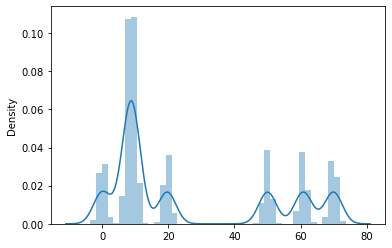

In [69]:
sns.distplot(df_g)

In [70]:
df_n.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.37,37.22,36.35,33.70,36.78,36.34,43.53,34.70,50.00
std,30.83,30.54,27.92,28.75,34.36,31.29,25.79,31.33,30.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.35,11.20,14.78,10.09,3.51,8.54,21.90,8.60,24.00
50%,30.41,29.47,27.31,24.26,27.37,28.55,39.15,26.56,50.00
75%,56.78,53.42,48.14,46.15,60.82,54.46,58.16,51.11,76.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [71]:
df_g.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,7.96,69.95,-0.00,9.80,60.82,8.59,19.63,8.59,50.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.01
min,4.21,66.17,-3.65,6.06,57.07,4.84,15.74,4.82,46.53
25%,7.29,69.28,-0.67,9.14,60.15,7.92,18.97,7.92,49.33
50%,7.95,69.94,-0.01,9.80,60.81,8.59,19.62,8.59,50.02
75%,8.64,70.63,0.68,10.48,61.49,9.27,20.31,9.28,50.69
max,11.68,73.66,3.85,13.54,64.54,12.31,23.37,12.28,53.66


# Finding probabbilties of all columns and joint probabilty on generated data set

#### Findining probabilities of all columns

In [72]:
df_g_prob=df_g.copy()

def f1(b):
    
    k=df_g[df_g[i] == b].shape[0]
    return(k/len(df_g))

for i in df_g.columns:
    # print(i)
    
    df_g_prob['prob_'+i] = df_g[i].apply(f1)

df_g_prob.head()
df_g_prob.head()
df_g_prob.prob_c2.value_counts()
df_g_prob.prob_c2.unique()


### Joint probability
df_g.columns

def f1(a):
    
    k=df_n[ (df_n[col[0]] == a[col[0]]) & (df_n[col[1]] == a[col[1]]) & (df_n[col[2]] == a[col[2]]) 
        & (df_n[col[3]] == a[col[3]]) & (df_n[col[4]] == a[col[4]]) & (df_n[col[5]] == a[col[5]])  
        & (df_n[col[6]] == a[col[6]]) & (df_n[col[7]] == a[col[7]]) & (df_n[col[8]] == a[col[8]])].shape[0]
    
    
    return(k/len(df_g))
    

df_g_prob['prob_joint'] = df_g.apply(f1,axis=1)

print('done')

# df_g
df_g_prob.head()
df_g_prob.prob_joint.unique()

done


array([0.])

#### This shows that all the rows in dataset are unique and hence the ombined joint probability is same for all rows

## Use model on new generated dataset

### Again creating smaller smaple dataset for running lazy predic models on generated dataste

In [73]:
df_gp=df_g.sample(frac =.2)
print(df_gp.shape)

(2387, 9)


In [74]:
X= df_gp.drop(columns='c17')
X
y=df_gp['c17']
y
offset = int(X.shape[0] * 0.9)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

### fitting data in LazyClassifier
models_3, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models_3)

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.00240146067113578, 'Adjusted R-Squared': -0.03726759843361016, 'RMSE': 1.0689461192567908, 'Time taken': 0.0684669017791748}


  5%|▍         | 2/42 [00:00<00:04,  9.65it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.07913925758116702, 'Adjusted R-Squared': 0.04710931871442503, 'RMSE': 1.0245471484488098, 'Time taken': 0.1388382911682129}
{'Model': 'BayesianRidge', 'R-Squared': 0.829902304019106, 'Adjusted R-Squared': 0.8239858624197706, 'RMSE': 0.4403359919397159, 'Time taken': 0.012001276016235352}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.4715862980459715, 'Adjusted R-Squared': -0.522771908412788, 'RMSE': 1.2951731640006863, 'Time taken': 0.02201223373413086}
{'Model': 'DummyRegressor', 'R-Squared': -6.902234204697599e-05, 'Adjusted R-Squared': -0.034854031814813835, 'RMSE': 1.0677017560732154, 'Time taken': 0.0070002079010009766}
{'Model': 'ElasticNet', 'R-Squared': -6.902234204697599e-05, 'Adjusted R-Squared': -0.034854031814813835, 'RMSE': 1.0677017560732154, 'Time taken': 0.007161855697631836}


 17%|█▋        | 7/42 [00:00<00:02, 13.40it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.4424816264303485, 'Adjusted R-Squared': 0.4230896830018389, 'RMSE': 0.7971949920307249, 'Time taken': 0.28349804878234863}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.6864906161724973, 'Adjusted R-Squared': -0.7451511593437146, 'RMSE': 1.3865225399347338, 'Time taken': 0.015327692031860352}


 21%|██▏       | 9/42 [00:01<00:04,  8.01it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.06110097140748327, 'Adjusted R-Squared': 0.028443613891221853, 'RMSE': 1.0345331568480822, 'Time taken': 0.45821261405944824}
{'Model': 'GammaRegressor', 'R-Squared': 0.0025586658696625797, 'Adjusted R-Squared': -0.03213494575226217, 'RMSE': 1.0662981366202349, 'Time taken': 0.01193690299987793}


 26%|██▌       | 11/42 [00:03<00:14,  2.14it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -64.73280482410838, 'Adjusted R-Squared': -67.01916325277303, 'RMSE': 8.656175471669174, 'Time taken': 2.479635238647461}


 29%|██▊       | 12/42 [00:03<00:13,  2.22it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.04177819820534534, 'Adjusted R-Squared': 0.008448744229879068, 'RMSE': 1.0451244152466128, 'Time taken': 0.36977267265319824}


 36%|███▌      | 15/42 [00:04<00:08,  3.21it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.1413374486107758, 'Adjusted R-Squared': 0.1114709250841941, 'RMSE': 0.9893415089920813, 'Time taken': 0.5052456855773926}
{'Model': 'HuberRegressor', 'R-Squared': 0.8061802997860898, 'Adjusted R-Squared': 0.7994387449960407, 'RMSE': 0.4700390374821407, 'Time taken': 0.08394742012023926}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.08777788927618957, 'Adjusted R-Squared': -0.1256136419466658, 'RMSE': 1.113538104715927, 'Time taken': 0.019603252410888672}


 48%|████▊     | 20/42 [00:06<00:06,  3.27it/s]

{'Model': 'KernelRidge', 'R-Squared': -2191.0795583961058, 'Adjusted R-Squared': -2267.3258039055354, 'RMSE': 49.98769664731694, 'Time taken': 1.7404491901397705}
{'Model': 'Lars', 'R-Squared': -1.9827571525714687, 'Adjusted R-Squared': -2.08650522744352, 'RMSE': 1.843927822986507, 'Time taken': 0.007157802581787109}
{'Model': 'LarsCV', 'R-Squared': -0.19871679469507209, 'Adjusted R-Squared': -0.24041129190185728, 'RMSE': 1.1689428114654614, 'Time taken': 0.020047903060913086}
{'Model': 'Lasso', 'R-Squared': -6.902234204697599e-05, 'Adjusted R-Squared': -0.034854031814813835, 'RMSE': 1.0677017560732154, 'Time taken': 0.006971836090087891}
{'Model': 'LassoCV', 'R-Squared': 0.447388393956751, 'Adjusted R-Squared': 0.4281671207030727, 'RMSE': 0.793679148013309, 'Time taken': 0.17326998710632324}
{'Model': 'LassoLars', 'R-Squared': -6.902234204697599e-05, 'Adjusted R-Squared': -0.034854031814813835, 'RMSE': 1.0677017560732154, 'Time taken': 0.007998943328857422}
{'Model': 'LassoLarsCV', 'R

 64%|██████▍   | 27/42 [00:07<00:03,  4.21it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.009267050885189088, 'Adjusted R-Squared': -0.04437199178554341, 'RMSE': 1.0726005545219626, 'Time taken': 1.1327409744262695}
{'Model': 'NuSVR', 'R-Squared': 0.14127425111781733, 'Adjusted R-Squared': 0.11140552941756743, 'RMSE': 0.9893779160489343, 'Time taken': 0.14947128295898438}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.000837902014374281, 'Adjusted R-Squared': -0.033915562263386656, 'RMSE': 1.0672175173156366, 'Time taken': 0.007367134094238281}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6069132483321109, 'Adjusted R-Squared': 0.5932406656654017, 'RMSE': 0.6693899272747672, 'Time taken': 0.016939401626586914}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.3623130541017615, 'Adjusted R-Squared': 0.3401326385922575, 'RMSE': 0.8525870519705208, 'Time taken': 0.009076356887817383}
{'Model': 'PoissonRegressor', 'R-Squared': 0.07799026595776337, 'Adjusted R-Squared': 0.04592036216498996, 'RMSE': 1.02518613166223

 76%|███████▌  | 32/42 [06:13<05:28, 32.87s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.0007340614408672952, 'Adjusted R-Squared': -0.035542202708375825, 'RMSE': 1.0680567042768923, 'Time taken': 365.51327776908875}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7505929845247321, 'Adjusted R-Squared': 0.7419179578995054, 'RMSE': 0.5331989705323038, 'Time taken': 0.05481910705566406}


 90%|█████████ | 38/42 [06:14<01:06, 16.63s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.12769296177066092, 'Adjusted R-Squared': 0.0973518473974665, 'RMSE': 0.9971710415180979, 'Time taken': 1.0387399196624756}
{'Model': 'Ridge', 'R-Squared': 0.5197929709055236, 'Adjusted R-Squared': 0.5030901177196287, 'RMSE': 0.739859451091017, 'Time taken': 0.007084846496582031}
{'Model': 'RidgeCV', 'R-Squared': 0.800460055029648, 'Adjusted R-Squared': 0.7935195352045923, 'RMSE': 0.47692478608339955, 'Time taken': 0.008914709091186523}
{'Model': 'SGDRegressor', 'R-Squared': 0.08177386403971743, 'Adjusted R-Squared': 0.04983556365849018, 'RMSE': 1.0230804706694039, 'Time taken': 0.008999824523925781}
{'Model': 'SVR', 'R-Squared': 0.15188828495589102, 'Adjusted R-Squared': 0.1223887470413133, 'RMSE': 0.9832444430820555, 'Time taken': 0.16445589065551758}


 98%|█████████▊| 41/42 [06:14<00:11, 11.94s/it]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8298778350103858, 'Adjusted R-Squared': 0.8239605423150949, 'RMSE': 0.44036766255613463, 'Time taken': 0.008000612258911133}
{'Model': 'TweedieRegressor', 'R-Squared': 0.002557889721670925, 'Adjusted R-Squared': -0.032135748896705785, 'RMSE': 1.0662985514842314, 'Time taken': 0.011089563369750977}
{'Model': 'XGBRegressor', 'R-Squared': 0.023471022890607318, 'Adjusted R-Squared': -0.010495202400154113, 'RMSE': 1.055060920301788, 'Time taken': 0.14327049255371094}


100%|██████████| 42/42 [06:14<00:00,  8.93s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.11623975059412783, 'Adjusted R-Squared': 0.08550026365827135, 'RMSE': 1.0036960183343178, 'Time taken': 0.08636879920959473}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                0.82       0.83  0.44        0.01
LinearRegression                             0.82       0.83  0.44        0.01
TransformedTargetRegressor                   0.82       0.83  0.44        0.01
LassoLarsCV                                  0.82       0.83  0.44        0.02
LassoLarsIC                                  0.82       0.83  0.44        0.01
HuberRegressor                               0.80       0.81  0.47        0.08
RidgeCV                                      0.79       0.80  0.48        0.01
RANSACRegressor                              0.74       0.75  0.53        0.05
OrthogonalMatchingPursuitCV                

# Part 4- Making multivariate gausian based on mean  of columns and corelation matrix

In [75]:
random_seed=1000
# cov = df_n.cov()

cov = df_n.corr()
mean= df_n.mean()

# mode=df_n.mode().mean()
# mode

distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)

# distr = multivariate_normal(cov = cov, mean = mean,
# 								seed = random_seed,allow_singular=True)


data = distr.rvs(size = df_n.shape[0])

### Generated data

In [76]:
df_g=pd.DataFrame(data)

In [77]:
df_g.head()

,0,1,2,3,4,5,6,7,8
0,38.17,38.01,37.15,34.53,37.61,37.15,44.25,35.51,49.67
1,37.77,37.69,36.89,34.24,37.05,36.76,44.11,35.15,49.33
2,36.06,35.94,35.15,32.47,35.53,35.06,42.26,33.38,51.01
3,37.84,37.63,36.44,33.97,37.31,36.80,43.93,35.11,50.81
4,37.37,37.31,36.68,33.94,36.72,36.40,43.40,34.78,50.58


In [78]:
df_g.columns = df_n.columns

In [79]:
df_g.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,38.17,38.01,37.15,34.53,37.61,37.15,44.25,35.51,49.67
1,37.77,37.69,36.89,34.24,37.05,36.76,44.11,35.15,49.33
2,36.06,35.94,35.15,32.47,35.53,35.06,42.26,33.38,51.01
3,37.84,37.63,36.44,33.97,37.31,36.80,43.93,35.11,50.81
4,37.37,37.31,36.68,33.94,36.72,36.40,43.40,34.78,50.58


<AxesSubplot:ylabel='Density'>

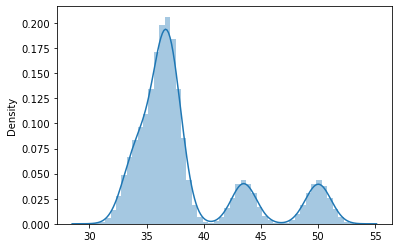

In [80]:
sns.distplot(df_g)

In [81]:
df_n.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.37,37.22,36.35,33.70,36.78,36.34,43.53,34.70,50.00
std,30.83,30.54,27.92,28.75,34.36,31.29,25.79,31.33,30.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.35,11.20,14.78,10.09,3.51,8.54,21.90,8.60,24.00
50%,30.41,29.47,27.31,24.26,27.37,28.55,39.15,26.56,50.00
75%,56.78,53.42,48.14,46.15,60.82,54.46,58.16,51.11,76.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [82]:
df_g.describe()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,37.36,37.21,36.35,33.69,36.77,36.34,43.52,34.69,50.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.01
min,33.61,33.44,32.70,29.95,33.02,32.58,39.63,30.91,46.53
25%,36.69,36.54,35.68,33.03,36.10,35.67,42.86,34.02,49.33
50%,37.35,37.20,36.33,33.69,36.76,36.33,43.51,34.68,50.02
75%,38.04,37.89,37.02,34.37,37.44,37.02,44.20,35.37,50.69
max,41.08,40.93,40.20,37.43,40.49,40.05,47.26,38.38,53.66


# Finding probabbilties of all columns and joint probabilty on generated data set

#### Findining probabilities of all columns

In [83]:
df_g_prob=df_g.copy()

def f1(b):
    
    k=df_g[df_g[i] == b].shape[0]
    return(k/len(df_g))

for i in df_g.columns:
    # print(i)
    
    df_g_prob['prob_'+i] = df_g[i].apply(f1)

df_g_prob.head()
df_g_prob.head()
df_g_prob.prob_c2.value_counts()
df_g_prob.prob_c2.unique()


### Joint probability
df_g.columns

def f1(a):
    
    k=df_n[ (df_n[col[0]] == a[col[0]]) & (df_n[col[1]] == a[col[1]]) & (df_n[col[2]] == a[col[2]]) 
        & (df_n[col[3]] == a[col[3]]) & (df_n[col[4]] == a[col[4]]) & (df_n[col[5]] == a[col[5]])  
        & (df_n[col[6]] == a[col[6]]) & (df_n[col[7]] == a[col[7]]) & (df_n[col[8]] == a[col[8]])].shape[0]
   
    
    return(k/len(df_g))
    

df_g_prob['prob_joint'] = df_g.apply(f1,axis=1)

print('done')

# df_g
df_g_prob.head()
df_g_prob.prob_joint.unique()

done


array([0.])

#### This shows that all the rows in dataset are unique and hence the ombined joint probability is same for all rows

## Use model on new generated dataset

### Again creating smaller smaple dataset for running lazy predic models on generated dataste

In [84]:
df_gp=df_g.sample(frac =.2)
print(df_gp.shape)

(2387, 9)


In [85]:
X= df_gp.drop(columns='c17')
X
y=df_gp['c17']
y
offset = int(X.shape[0] * 0.9)

### splitting dataset into training and testing part.
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)


### fitting data in LazyClassifier
models_4, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models_4)

  5%|▍         | 2/42 [00:00<00:05,  7.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.013789387766734773, 'Adjusted R-Squared': -0.04905162734122981, 'RMSE': 0.864450270887217, 'Time taken': 0.10177397727966309}
{'Model': 'BaggingRegressor', 'R-Squared': -0.005699780382486752, 'Adjusted R-Squared': -0.04068064230883417, 'RMSE': 0.860994390536728, 'Time taken': 0.15389013290405273}
{'Model': 'BayesianRidge', 'R-Squared': 0.7300179118209489, 'Adjusted R-Squared': 0.7206272304929819, 'RMSE': 0.4461014351227396, 'Time taken': 0.013250589370727539}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.6149600275363616, 'Adjusted R-Squared': -1.7059151589289305, 'RMSE': 1.3883490634493296, 'Time taken': 0.0251619815826416}
{'Model': 'DummyRegressor', 'R-Squared': -0.027921958811190306, 'Adjusted R-Squared': -0.06367576607418823, 'RMSE': 0.8704547833943606, 'Time taken': 0.009482860565185547}
{'Model': 'ElasticNet', 'R-Squared': -0.027921958811190306, 'Adjusted R-Squared': -0.06367576607418823, 'RMSE': 0.8704547833943606, 'Time taken

 17%|█▋        | 7/42 [00:00<00:02, 14.78it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.33113154447901116, 'Adjusted R-Squared': 0.3078665547217594, 'RMSE': 0.7021606731369406, 'Time taken': 0.19979619979858398}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.5881768069693498, 'Adjusted R-Squared': -1.6782003480813272, 'RMSE': 1.3812208161344568, 'Time taken': 0.01018667221069336}


 21%|██▏       | 9/42 [00:00<00:03,  8.79it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.004586561123518962, 'Adjusted R-Squared': -0.03952870237998929, 'RMSE': 0.8605177368973541, 'Time taken': 0.41672277450561523}
{'Model': 'GammaRegressor', 'R-Squared': -0.025689253376108168, 'Adjusted R-Squared': -0.06136540131962498, 'RMSE': 0.8695089306530688, 'Time taken': 0.013000011444091797}


 26%|██▌       | 11/42 [00:03<00:14,  2.21it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -170.68511824775132, 'Adjusted R-Squared': -176.65677453462962, 'RMSE': 11.249480579793508, 'Time taken': 2.3884999752044678}


 29%|██▊       | 12/42 [00:03<00:12,  2.33it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.007817281348024507, 'Adjusted R-Squared': -0.026693421909435466, 'RMSE': 0.8551887391061274, 'Time taken': 0.32208919525146484}


 31%|███       | 13/42 [00:04<00:12,  2.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.0726848264579667, 'Adjusted R-Squared': 0.040430385639113386, 'RMSE': 0.8267607059503232, 'Time taken': 0.42549777030944824}
{'Model': 'HuberRegressor', 'R-Squared': 0.7197202421666062, 'Adjusted R-Squared': 0.7099713810245751, 'RMSE': 0.4545294329807228, 'Time taken': 0.0706031322479248}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.1262596923013115, 'Adjusted R-Squared': -0.16543394246831378, 'RMSE': 0.9111406336364251, 'Time taken': 0.01454782485961914}


 38%|███▊      | 16/42 [00:05<00:12,  2.02it/s]

{'Model': 'KernelRidge', 'R-Squared': -3404.4940123352944, 'Adjusted R-Squared': -3522.9459779817394, 'RMSE': 50.10213177293939, 'Time taken': 1.6341078281402588}
{'Model': 'Lars', 'R-Squared': 0.7089521635611109, 'Adjusted R-Squared': 0.6988287605545409, 'RMSE': 0.4631784360302983, 'Time taken': 0.007000446319580078}
{'Model': 'LarsCV', 'R-Squared': 0.7202576506607303, 'Adjusted R-Squared': 0.71052748198806, 'RMSE': 0.4540934664623676, 'Time taken': 0.02099752426147461}
{'Model': 'Lasso', 'R-Squared': -0.027921958811190306, 'Adjusted R-Squared': -0.06367576607418823, 'RMSE': 0.8704547833943606, 'Time taken': 0.008002996444702148}


 48%|████▊     | 20/42 [00:06<00:06,  3.48it/s]

{'Model': 'LassoCV', 'R-Squared': 0.33110785709898904, 'Adjusted R-Squared': 0.3078420434328669, 'RMSE': 0.7021731062239785, 'Time taken': 0.1752767562866211}
{'Model': 'LassoLars', 'R-Squared': -0.027921958811190306, 'Adjusted R-Squared': -0.06367576607418823, 'RMSE': 0.8704547833943606, 'Time taken': 0.008087873458862305}
{'Model': 'LassoLarsCV', 'R-Squared': 0.729939091352631, 'Adjusted R-Squared': 0.7205456684431573, 'RMSE': 0.44616654936474454, 'Time taken': 0.01922607421875}
{'Model': 'LassoLarsIC', 'R-Squared': 0.729939091352631, 'Adjusted R-Squared': 0.7205456684431573, 'RMSE': 0.44616654936474454, 'Time taken': 0.009006261825561523}
{'Model': 'LinearRegression', 'R-Squared': 0.7299390913524546, 'Adjusted R-Squared': 0.7205456684429747, 'RMSE': 0.4461665493648902, 'Time taken': 0.005242824554443359}
{'Model': 'LinearSVR', 'R-Squared': 0.48492927445742684, 'Adjusted R-Squared': 0.46701377096029384, 'RMSE': 0.6161686213326383, 'Time taken': 0.018245220184326172}


 64%|██████▍   | 27/42 [00:07<00:03,  4.36it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.21542255174309188, 'Adjusted R-Squared': -0.25769811876024296, 'RMSE': 0.9465199878539996, 'Time taken': 1.1054155826568604}
{'Model': 'NuSVR', 'R-Squared': 0.09441962031840634, 'Adjusted R-Squared': 0.06292117232948136, 'RMSE': 0.8170142786587424, 'Time taken': 0.13511300086975098}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.029932704900238027, 'Adjusted R-Squared': -0.06575645115763762, 'RMSE': 0.871305727592028, 'Time taken': 0.006996631622314453}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.2982538082177735, 'Adjusted R-Squared': 0.27384524502534824, 'RMSE': 0.7192107606759105, 'Time taken': 0.017094135284423828}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2683741996197355, 'Adjusted R-Squared': -0.3124915630847698, 'RMSE': 0.9669184429305332, 'Time taken': 0.006993770599365234}
{'Model': 'PoissonRegressor', 'R-Squared': 0.044959141868712416, 'Adjusted R-Squared': 0.011740329411972006, 'RMSE': 0.83902928649

 76%|███████▌  | 32/42 [06:16<05:21, 32.13s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.025331140502407923, 'Adjusted R-Squared': -0.06099483234596992, 'RMSE': 0.8693571256473736, 'Time taken': 369.492800951004}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6806811889532216, 'Adjusted R-Squared': 0.6695744476994205, 'RMSE': 0.48515263681204, 'Time taken': 0.039797067642211914}


 90%|█████████ | 38/42 [06:18<01:06, 16.53s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.01916804219033008, 'Adjusted R-Squared': -0.014947851994354, 'RMSE': 0.850282906124132, 'Time taken': 0.9994425773620605}
{'Model': 'Ridge', 'R-Squared': 0.46527101061176246, 'Adjusted R-Squared': 0.4466717414156498, 'RMSE': 0.6278169098532953, 'Time taken': 0.007308244705200195}
{'Model': 'RidgeCV', 'R-Squared': 0.7159998353827219, 'Adjusted R-Squared': 0.7061215687873383, 'RMSE': 0.45753617824092285, 'Time taken': 0.01092076301574707}
{'Model': 'SGDRegressor', 'R-Squared': 0.06060855356361927, 'Adjusted R-Squared': 0.027934068470179874, 'RMSE': 0.8321266767274395, 'Time taken': 0.009342193603515625}
{'Model': 'SVR', 'R-Squared': 0.11651312206671405, 'Adjusted R-Squared': 0.08578314370381712, 'RMSE': 0.8069863635766067, 'Time taken': 0.17453384399414062}


 98%|█████████▊| 41/42 [06:18<00:11, 11.93s/it]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7299390913524546, 'Adjusted R-Squared': 0.7205456684429747, 'RMSE': 0.4461665493648902, 'Time taken': 0.00699162483215332}
{'Model': 'TweedieRegressor', 'R-Squared': -0.02568374414203345, 'Adjusted R-Squared': -0.061359700460017264, 'RMSE': 0.8695065954747261, 'Time taken': 0.012001276016235352}
{'Model': 'XGBRegressor', 'R-Squared': -0.10683701816950286, 'Adjusted R-Squared': -0.14533569706235516, 'RMSE': 0.9032500248595797, 'Time taken': 0.14974498748779297}


100%|██████████| 42/42 [06:18<00:00,  9.01s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.09570328941917627, 'Adjusted R-Squared': 0.06424949079027809, 'RMSE': 0.816435010415877, 'Time taken': 0.08996343612670898}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                0.72       0.73  0.45        0.01
LassoLarsCV                                  0.72       0.73  0.45        0.02
LassoLarsIC                                  0.72       0.73  0.45        0.01
TransformedTargetRegressor                   0.72       0.73  0.45        0.01
LinearRegression                             0.72       0.73  0.45        0.01
LarsCV                                       0.71       0.72  0.45        0.02
HuberRegressor                               0.71       0.72  0.45        0.07
RidgeCV                                      0.71       0.72  0.46        0.01
Lars                                        

# Comparing all models results of parts

In [86]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GaussianProcessRegressor                     1.00       1.00  0.47        2.37
ExtraTreesRegressor                          0.95       0.95  6.18        0.32
HistGradientBoostingRegressor                0.95       0.95  6.55        0.42
XGBRegressor                                 0.95       0.95  6.58        0.79
RandomForestRegressor                        0.94       0.95  6.75        0.72
LGBMRegressor                                0.94       0.94  6.93        0.08
BaggingRegressor                             0.93       0.93  7.76        0.09
ExtraTreeRegressor                           0.87       0.87 10.49        0.01
DecisionTreeRegressor                        0.86       0.86 10.84        0.02
KNeighborsRegressor                          0.80       0.80 12.86        0.01
GradientBoostingRegressor                    0.77   

In [87]:
print(models_1)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BayesianRidge                                0.80       0.81  13.98   
LassoLarsCV                                  0.80       0.81  13.98   
LassoLarsIC                                  0.80       0.81  13.98   
TransformedTargetRegressor                   0.80       0.81  13.98   
LinearRegression                             0.80       0.81  13.98   
HuberRegressor                               0.79       0.80  14.27   
Lars                                         0.78       0.79  14.50   
RANSACRegressor                              0.77       0.77  15.13   
RidgeCV                                      0.76       0.77  15.28   
PassiveAggressiveRegressor                   0.66       0.68  18.09   
Ridge                                        0.45       0.47  23.05   
LassoCV                                      0.37       0.39  24.71   
Orthog

In [88]:
print(models_2)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
TransformedTargetRegressor                   0.81       0.81  13.21   
LinearRegression                             0.81       0.81  13.21   
LassoLarsCV                                  0.81       0.81  13.21   
LassoLarsIC                                  0.81       0.81  13.21   
BayesianRidge                                0.81       0.81  13.22   
HuberRegressor                               0.79       0.80  13.75   
LarsCV                                       0.78       0.79  14.04   
RidgeCV                                      0.75       0.76  14.91   
RANSACRegressor                              0.73       0.74  15.53   
PassiveAggressiveRegressor                   0.72       0.72  16.02   
OrthogonalMatchingPursuitCV                  0.54       0.56  20.34   
Ridge                                        0.43       0.45  22.74   
LassoC

In [89]:
print(models_3)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                0.82       0.83  0.44        0.01
LinearRegression                             0.82       0.83  0.44        0.01
TransformedTargetRegressor                   0.82       0.83  0.44        0.01
LassoLarsCV                                  0.82       0.83  0.44        0.02
LassoLarsIC                                  0.82       0.83  0.44        0.01
HuberRegressor                               0.80       0.81  0.47        0.08
RidgeCV                                      0.79       0.80  0.48        0.01
RANSACRegressor                              0.74       0.75  0.53        0.05
OrthogonalMatchingPursuitCV                  0.59       0.61  0.67        0.02
LinearSVR                                    0.53       0.54  0.72        0.02
Ridge                                        0.50   

In [90]:
print(models_4)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                0.72       0.73  0.45        0.01
LassoLarsCV                                  0.72       0.73  0.45        0.02
LassoLarsIC                                  0.72       0.73  0.45        0.01
TransformedTargetRegressor                   0.72       0.73  0.45        0.01
LinearRegression                             0.72       0.73  0.45        0.01
LarsCV                                       0.71       0.72  0.45        0.02
HuberRegressor                               0.71       0.72  0.45        0.07
RidgeCV                                      0.71       0.72  0.46        0.01
Lars                                         0.70       0.71  0.46        0.01
RANSACRegressor                              0.67       0.68  0.49        0.04
LinearSVR                                    0.47   

# Best gaussian estimate (part 3)

In [91]:
random_seed=1000
# cov = df_n.cov()

cov = df_n.corr()
# mean= df_n.mean()

mode=df_n.mode().mean()
# mode

distr = multivariate_normal(cov = cov, mean = mode,
								seed = random_seed)

# distr = multivariate_normal(cov = cov, mean = mean,
# 								seed = random_seed,allow_singular=True)


data = distr.rvs(size = df_n.shape[0])
### Generated data
df_g=pd.DataFrame(data)
df_g.head()
df_g.columns = df_n.columns
df_g.head()

,c12,c2,c14,c15,c3,c10,c7,c6,c17
0,8.77,70.74,0.80,10.64,61.65,9.41,20.36,9.41,49.67
1,8.37,70.43,0.54,10.35,61.09,9.01,20.22,9.06,49.33
2,6.67,68.68,-1.19,8.58,59.58,7.32,18.37,7.28,51.01
3,8.44,70.37,0.10,10.08,61.36,9.05,20.04,9.01,50.81
4,7.97,70.04,0.34,10.05,60.77,8.66,19.51,8.69,50.58


# Joint distribution plot of original dataste and best generated dataset (part 3)

### Orginal dataset

<AxesSubplot:ylabel='Density'>

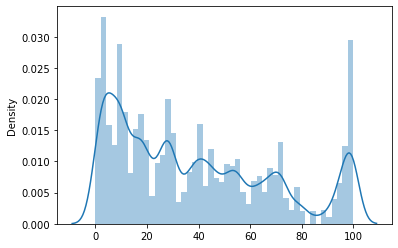

In [92]:
sns.distplot(df_n)

### Generated dataset of best model (part 3)

<AxesSubplot:ylabel='Density'>

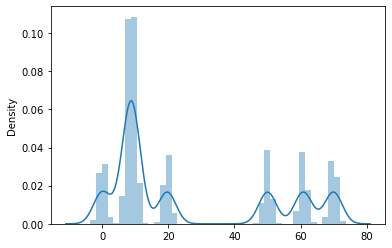

In [93]:
sns.distplot(df_g)

### the generated datset which gave best results of ML model is not gaussian this is because the joint distribution plot of original datset is not gaussian also

# Results

### It can be seen that part 3( mean of mode of columns and correlation matrix)   performed best and has results of ML models result of R2adj = 0.82 which is closest to results of original dataset

# Conclusion

### We have built a mutilvarite gausian on all the columns of dataset, we sued for variations and parts trying to best fit our dataset on multivariate gaussian

## Following conclusions were made:

## For original dataset:
#### The 9 columns are not purely gaussian and are mostly skewed and therefore its combined distribution plot is not pure Gaussian, the best result of ML model from lazy predit is R2adj = 1.0


## For part 1 (using mean of columns and covariance matrix):
### The comined distribution plot is purely gaussuian as shown in figure also, the best result of ML model from lazy predit is R2adj = 0.8


## For part 2 (using mean of mode of columns and covariance matrix):
### The comined distribution plot is purely gaussuian as shown in figure also, the best result of ML model from lazy predit is R2adj = 0.81


## For part 3 (using mean of mode of columns and correlation matrix):
### The comined distribution plot is purely gaussuian as shown in figure also, the best result of ML model from lazy predit is R2adj = 0.82


## For part 4 (using mean of  columns and correlation matrix):
### The comined distribution plot is purely gaussuian as shown in figure also, the best result of ML model from lazy predit is R2adj = 0.72

# Fututure Work:

### Can use best models of Lazy predict on complete dataset.
### Find ways of using implementing MLE and joint probabilities to find the mean and standard deviation of sample
### Find dataset which has norammly distributed random variables (features)

# End